In [116]:
# importar librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [117]:
# cargar datos

df = pd.read_csv("./data_raw/articulos_ml.csv")

In [118]:
df.shape

(161, 8)

In [119]:
df.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [120]:
df.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


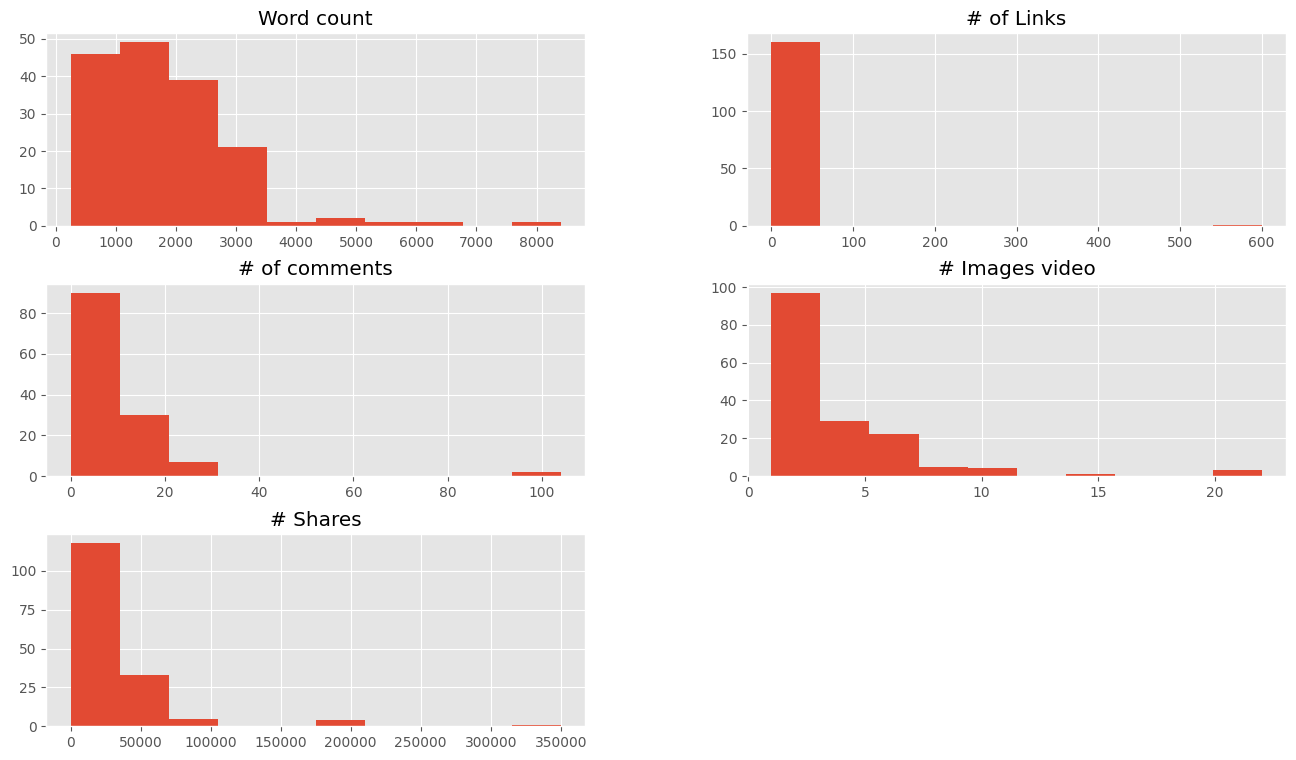

In [121]:
df.drop(['Title', 'url', 'Elapsed days'], axis=1).hist()
plt.show()

In [122]:
# filtrar los datos por conteo de palabras menor a 3500 y número de compartidas menor a 80000

df_filtered = df[(df['Word count'] <= 3500) & (df['# Shares'] <= 80000)]

colores = ['orange', 'blue']
tamanios = [30, 60]

f1 = df_filtered['Word count'].values
f2 = df_filtered['# Shares'].values

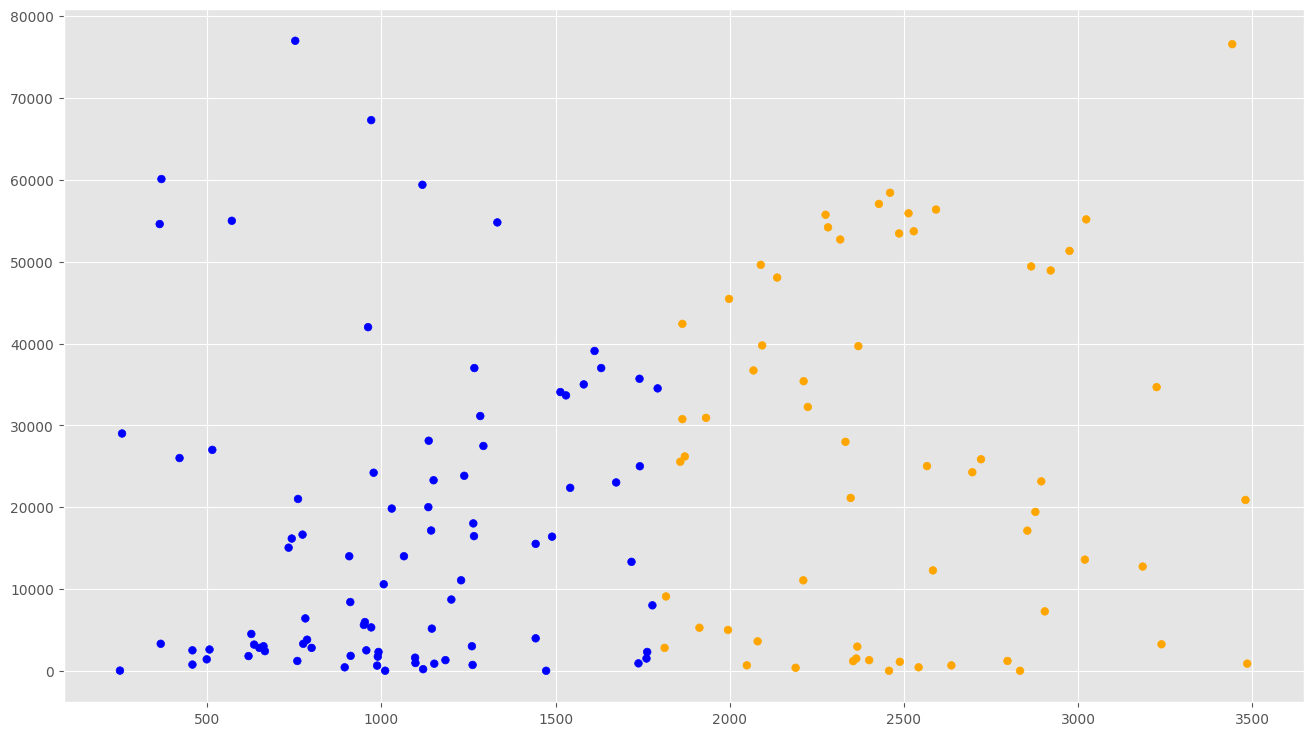

In [123]:
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras

asignar = []
for index, row in df_filtered.iterrows():
    if (row['Word count'] > 1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [124]:
# regresión lineal simple

X_train = df_filtered['Word count'].values.reshape(-1, 1)
y_train = df_filtered['# Shares'].values

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)

print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


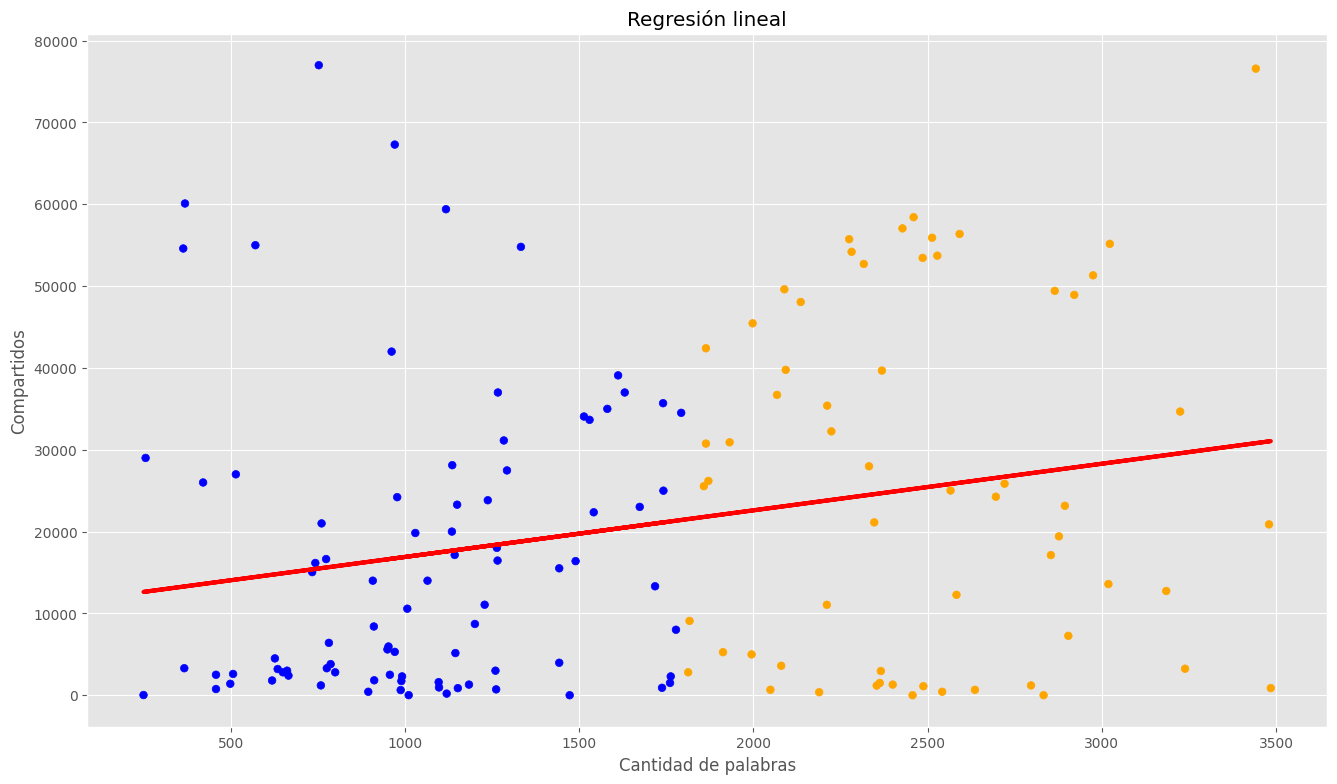

In [125]:
# graficar la linea de regresión

plt.scatter(X_train, y_train, c=asignar, s=tamanios[0])
plt.plot(X_train, y_pred, color='red', linewidth=3)
plt.xlabel('Cantidad de palabras')
plt.ylabel('Compartidos')
plt.title('Regresión lineal')
plt.show()

In [126]:
# predecir número de compartidos

y_dosmil = regr.predict([[2000]])
print(y_dosmil)

[22595.61053785]


**Regresión Lineal Múltiple**

In [127]:
# sumar links, comentarios e imágenes

suma = (df_filtered['# of Links'] + 
        df_filtered['# of comments'].fillna(0) + 
        df_filtered['# Images video'])

In [128]:
# crear df 2d y variable z

data2D = pd.DataFrame()
data2D['Word count'] = df_filtered['Word count']
data2D['suma'] = suma

XY_train = np.array(data2D)
z_train = df_filtered['# Shares'].values

In [129]:
# regresión lineal múltiple

regr2 = linear_model.LinearRegression()
regr2.fit(XY_train, z_train)

LinearRegression()

In [130]:
# predecir número de compartidos

z_pred = regr2.predict(XY_train)

In [131]:
# coeficientes, MSE, R2

print("Coefficients: ", regr2.coef_)
print("MSE: %.2f" % mean_squared_error(z_train, z_pred))
print("R2 score: %.2f" % r2_score(z_train, z_pred))

Coefficients:  [   6.63216324 -483.40753769]
MSE: 352122816.48
R2 score: 0.11


**Visualización 3D**

c:\Users\ingen\Documents\estudio\especializacion_ml\esp_ml_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


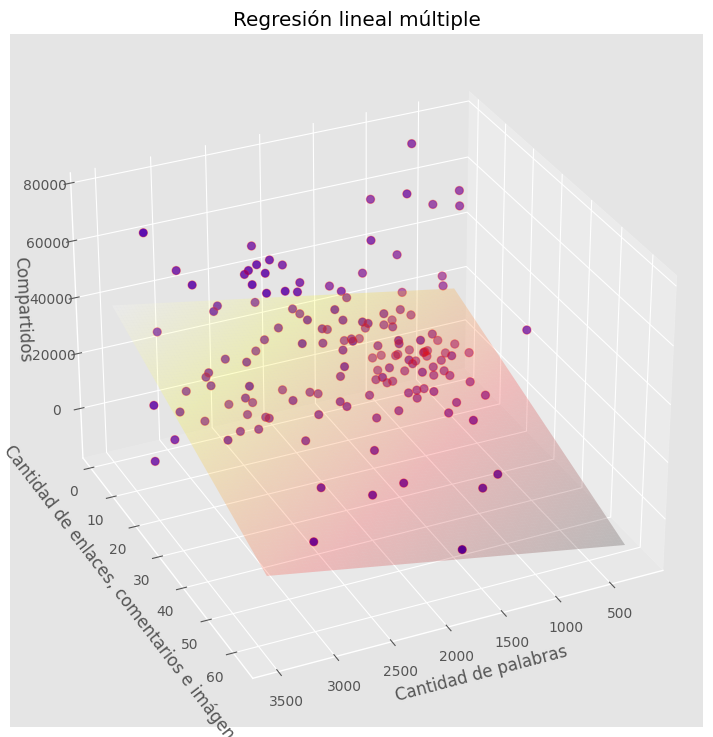

In [150]:
# gráfico en 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# crear malla de puntos

x_surf = np.linspace(data2D['Word count'].min(), data2D['Word count'].max(), 100)
y_surf = np.linspace(data2D['suma'].min(), data2D['suma'].max(), 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# calcular valores del plano

onlyX = pd.DataFrame({'Word count': x_surf.ravel(), 'suma': y_surf.ravel()})
z = regr2.predict(onlyX)
z = z.reshape(x_surf.shape)

# graficar plano

ax.plot_surface(x_surf, y_surf, z, rstride=1, cstride=1, cmap='hot', alpha=0.2)

# graficar puntos

ax.scatter(data2D['Word count'], data2D['suma'], z_train, c='blue', s=30)
ax.scatter(data2D['Word count'], data2D['suma'], z_train, c='red', s=40, alpha=0.3)
ax.view_init(elev=30., azim=65)
ax.set_xlabel('Cantidad de palabras')
ax.set_ylabel('Cantidad de enlaces, comentarios e imágenes')
ax.set_zlabel('Compartidos')
ax.set_title('Regresión lineal múltiple')
plt.show()

In [151]:
# predicción de shares por articulo

z_dosmil = regr2.predict([[2000, 10+4+6]])
print(z_dosmil)

[20518.0668244]
